In [38]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [39]:
input_dir='./Data'
output_dir='./Image'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# list of precipitation files
nc_list=[file for file in os.listdir(input_dir) if file.endswith('.nc4')]

len_ncfile=len(nc_list)


# extract the date & time from precipitation filename
def date_time (idx):
    year=nc_list[idx].split('.')[4].split('-')[0][:4]
    month=nc_list[idx].split('.')[4].split('-')[0][4:6]
    day=nc_list[idx].split('.')[4].split('-')[0][-2:]

    hour=nc_list[idx].split('.')[4].split('-')[1][1:3]
    minute=nc_list[idx].split('.')[4].split('-')[1][3:5]
    
    return year+'-'+month+'-'+day+' '+hour+':'+minute

## Plot Single Precipitation Data

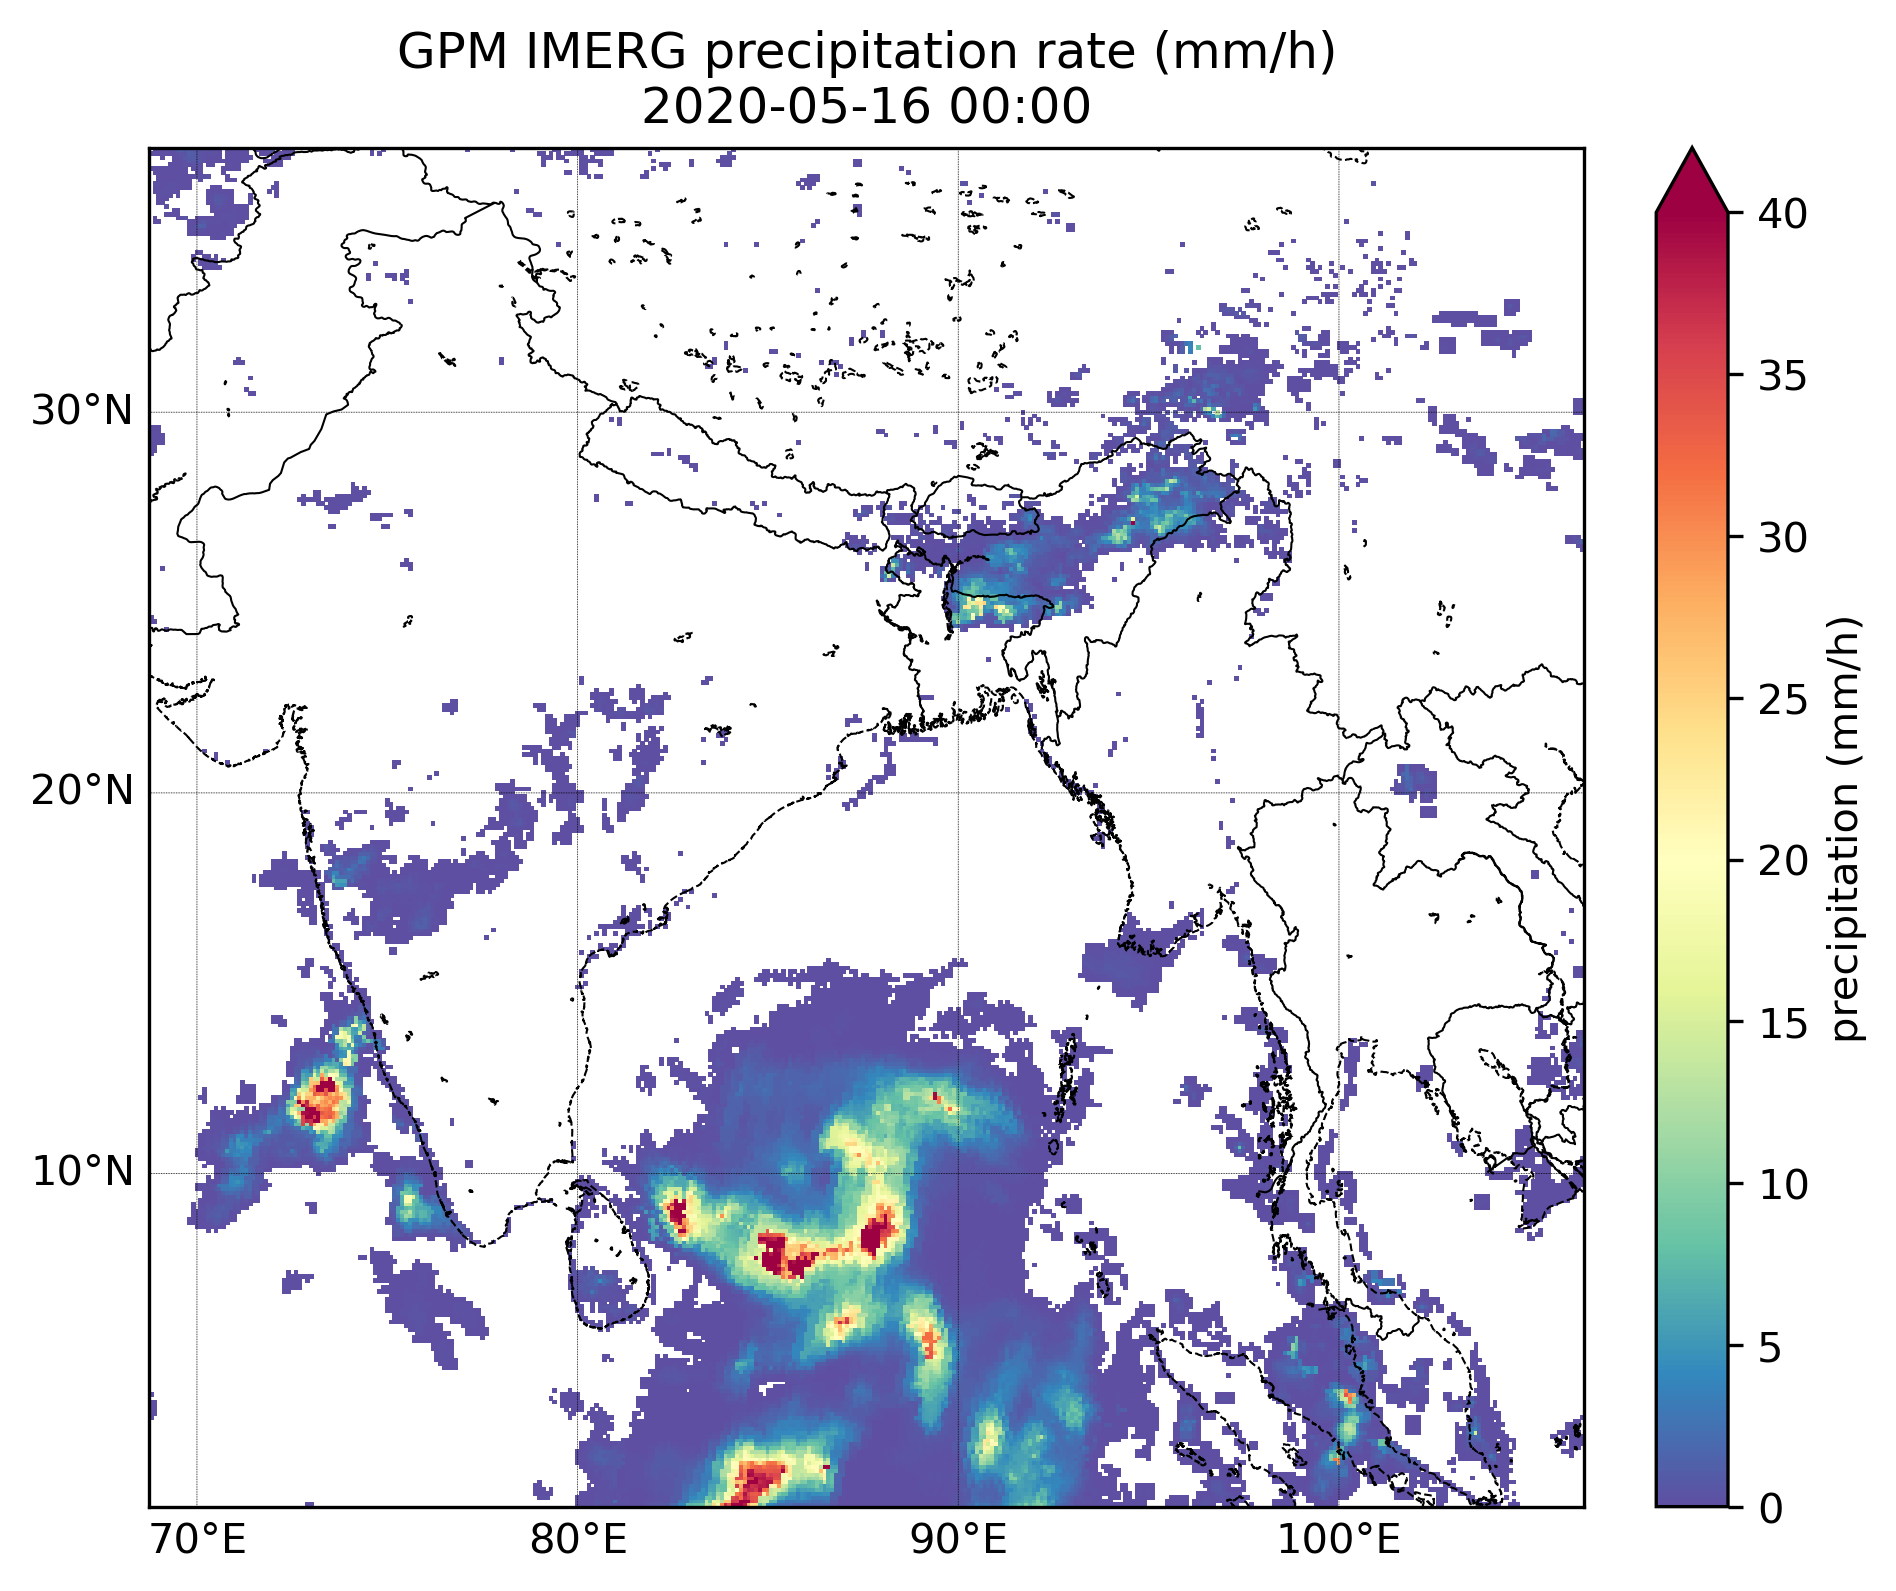

In [40]:
input_file=os.path.join(input_dir,nc_list[0])

ncfile=Dataset(input_file, 'r') # read the netcdf file
precip=ncfile['precipitationCal'][:]
latitude=ncfile['lat'][:]
longitude=ncfile['lon'][:]
precip_mask=np.ma.masked_less_equal(precip,0) # mask precipitation value below or equal 0

plt.figure(figsize=(8,6),dpi=300)
mp=Basemap(projection='cyl',llcrnrlat=latitude.min(),urcrnrlat=latitude.max(),llcrnrlon=longitude.min(),urcrnrlon=longitude.max(),resolution='h')

# Draw coastlines and country boundaries, edge of map.
mp.drawcoastlines(linewidth=0.5,linestyle='--',color='k')
mp.drawcountries()

# Define the latitude and longitude data
lon, lat=np.float32(np.meshgrid(longitude, latitude))
x,y=mp(lon,lat)
 
# Plot the data
cs = mp.pcolor(x,y,np.transpose(precip_mask[0]),cmap='Spectral_r',vmin=0,vmax=40)
parallels = np.arange(-60.,61,10)
mp.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.2)
meridians = np.arange(-180.,180.,10.)
mp.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0.2)


# Set the title and fonts
plt.title(f'GPM IMERG precipitation rate (mm/h)\n{date_time(0)}')

# Add colorbar
cbar = mp.colorbar(cs,location='right',pad="5%",extend='max')
cbar.set_label('precipitation (mm/h)')

plt.savefig('IMERG_map.jpg', bbox_inches='tight')
ncfile.close()

## Plot all Data

In [ ]:
for idx, file in enumerate(nc_list):
    input_file=os.path.join(input_dir,file)

    ncfile=Dataset(input_file, 'r') # read the netcdf file
    precip=ncfile['precipitationCal'][:]
    latitude=ncfile['lat'][:]
    longitude=ncfile['lon'][:]
    precip_mask=np.ma.masked_less_equal(precip,0) # mask precipitation value below or equal 0

    plt.figure(figsize=(8,6),dpi=300)
    mp=Basemap(projection='cyl',llcrnrlat=latitude.min(),urcrnrlat=latitude.max(),llcrnrlon=longitude.min(),urcrnrlon=longitude.max(),resolution='h')

    # Draw coastlines and country boundaries, edge of map.
    mp.drawcoastlines(linewidth=0.5,linestyle='--',color='k')
    mp.drawcountries()

    # Define the latitude and longitude data
    lon, lat=np.float32(np.meshgrid(longitude, latitude))
    x,y=mp(lon,lat)
 
    # Plot the data
    cs = mp.pcolor(x,y,np.transpose(precip_mask[0]),cmap='Spectral_r',vmin=0,vmax=40)
    parallels = np.arange(-60.,61,10)
    mp.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.2)
    meridians = np.arange(-180.,180.,10.)
    mp.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0.2)


    # Set the title and fonts
    plt.title(f'GPM IMERG precipitation rate (mm/h)\n{date_time(idx)}')

    # Add colorbar
    cbar = mp.colorbar(cs,location='right',pad="5%",extend='max')
    cbar.set_label('precipitation (mm/h)')
    
    image_name=date_time(idx).replace(':','-')+'.jpg'
    output_file=os.path.join(output_dir,image_name)

    plt.savefig(output_file, bbox_inches='tight')
    plt.clf()
    ncfile.close()
    
    print(f'processing is done for file {date_time(idx)}')